<IPython.core.display.Javascript object>


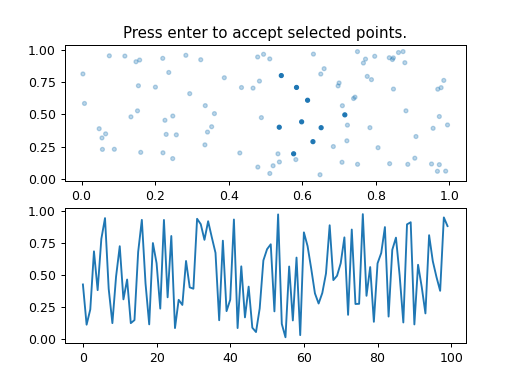

In [74]:
%matplotlib notebook
import numpy as np

from matplotlib.widgets import LassoSelector
from matplotlib.path import Path


class SelectFromCollection:
    """
    Select indices from a matplotlib collection using `LassoSelector`.

    Selected indices are saved in the `ind` attribute. This tool fades out the
    points that are not part of the selection (i.e., reduces their alpha
    values). If your collection has alpha < 1, this tool will permanently
    alter the alpha values.

    Note that this tool selects collection objects based on their *origins*
    (i.e., `offsets`).

    Parameters
    ----------
    ax : `~matplotlib.axes.Axes`
        Axes to interact with.
    collection : `matplotlib.collections.Collection` subclass
        Collection you want to select from.
    alpha_other : 0 <= float <= 1
        To highlight a selection, this tool sets all selected points to an
        alpha value of 1 and non-selected points to *alpha_other*.
    """

    def __init__(self, ax, collection, alpha_other=0.3):
        self.canvas = ax.figure.canvas
        self.collection = collection
        self.alpha_other = alpha_other

        self.xys = collection.get_offsets()
        self.Npts = len(self.xys)

        # Ensure that we have separate colors for each object
        self.fc = collection.get_facecolors()
        if len(self.fc) == 0:
            raise ValueError('Collection must have a facecolor')
        elif len(self.fc) == 1:
            self.fc = np.tile(self.fc, (self.Npts, 1))

        self.lasso = LassoSelector(ax, onselect=self.onselect)
        self.ind = []

    def onselect(self, verts):
        path = Path(verts)
        self.ind = np.nonzero(path.contains_points(self.xys))[0]
        self.fc[:, -1] = self.alpha_other
        self.fc[self.ind, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()
        plt.figure()
        plt.plot(np.arange(10) , np.arange(10))
        plt.show()

    def disconnect(self):
        self.lasso.disconnect_events()
        self.fc[:, -1] = 1
#         self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()


if __name__ == '__main__':
    import matplotlib.pyplot as plt
    
    data2 = np.random.rand(100,100)
    
    # Fixing random state for reproducibility
    np.random.seed(19680801)

    data = np.random.rand(100, 2)

#     subplot_kw = dict(xlim=(0, 1), ylim=(0, 1), autoscale_on=False)
#     fig, ax = plt.subplots(nrows=2,ncols=1, subplot_kw=subplot_kw)
    fig, ax = plt.subplots(nrows=2,ncols=1)
    
    pts = ax[0].scatter(data[:, 0], data[:, 1], s=10 , c=data[:,0])
    selector = SelectFromCollection(ax[0], pts)
    ax[1].plot(data2[:,0])

    def keypress(event):
        if event.key == "enter":
            print("Selected points:")
            print(selector.xys[selector.ind])
            selector.disconnect()
            ax.set_title("")
            fig.canvas.draw()
        if event.key == "shift":
            ax[1].clear()
            ax[1].plot(data2[:,np.random.randint(10)])

    
    fig.canvas.mpl_connect("key_press_event", keypress)
    ax[0].set_title("Press enter to accept selected points.")

    plt.show()

In [72]:
np.random.randint(10)

1

In [51]:
data2[:,0]

array([0.08942799, 0.61846039, 0.57644634, 0.8066364 , 0.10428134,
       0.38265461, 0.25839925, 0.00661708, 0.99071994, 0.62844775,
       0.01591181, 0.42496247, 0.67685134, 0.59590393, 0.61795568,
       0.78772086, 0.51661465, 0.80389815, 0.0568495 , 0.99185748,
       0.80519393, 0.78092468, 0.05567648, 0.09446146, 0.53673642,
       0.79327682, 0.57699037, 0.86607982, 0.91633099, 0.26802159,
       0.13496266, 0.56686447, 0.00356459, 0.78187747, 0.8229856 ,
       0.98468685, 0.17335648, 0.06181804, 0.13649231, 0.84635304,
       0.44006367, 0.04008681, 0.50612457, 0.04548733, 0.16385933,
       0.20359868, 0.36790063, 0.22535158, 0.00124102, 0.68049677,
       0.32664185, 0.65975744, 0.84290441, 0.88344242, 0.44028466,
       0.39517074, 0.87554684, 0.76757422, 0.29926943, 0.62608935,
       0.41694166, 0.76243231, 0.42675114, 0.12043524, 0.87359462,
       0.00592651, 0.92495714, 0.11087867, 0.81204728, 0.55067323,
       0.38153472, 0.05160357, 0.3567114 , 0.77276273, 0.61502

In [44]:
selector.ind
pts.x

AttributeError: 'PathCollection' object has no attribute 'x'

<IPython.core.display.Javascript object>


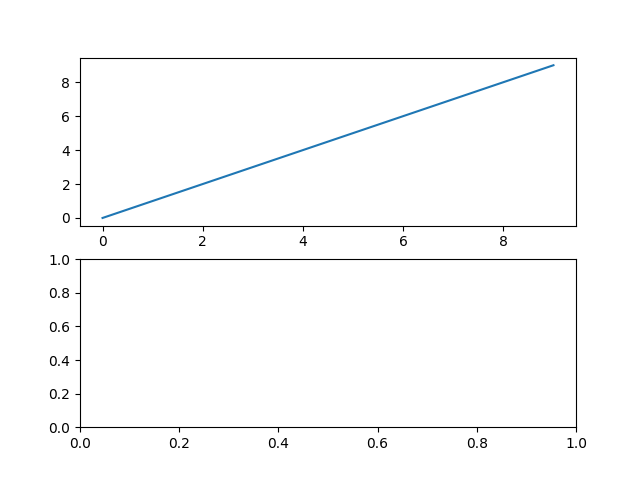

In [33]:
fig, ax = plt.subplots(nrows=2,ncols=1)
ax[0].plot(np.arange(10) , np.arange(10))